<a href="https://colab.research.google.com/github/DrStephPowers/MGMT-in-Python/blob/main/Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Short Term Methods

## Moving Average

In [53]:
C = (60, 65, 55, 58)

In [54]:
Period = (1, 2, 3, 4)

In [55]:
ct = pd.DataFrame(list(zip(Period, C)), columns=["Period", "Complaints"])

In [56]:
ct

,Period,Complaints
0,1,60
1,2,65
2,3,55
3,4,58


In [71]:
def moving_average(data, periods):
    weights = np.repeat(1.0, periods) / periods
    return np.convolve(data, weights, mode='valid')

In [58]:
ma = moving_average(ct["Complaints"], 3)

In [59]:
ma[0]

60.0

In [60]:
ma[1]

59.33333333333333

In [62]:
for i in range(4,15):
  ma = moving_average(ct["Complaints"], 3)
  temp = pd.DataFrame([[i, ma[-1]]], columns=["Period", "Complaints"])
  ct = pd.concat([ct, temp], ignore_index=True)

ct

,Period,Complaints
0,1,60.000000
1,2,65.000000
2,3,55.000000
3,4,58.000000
4,4,59.333333
5,5,57.444444
6,6,58.259259
7,7,58.345679
8,8,58.016461
9,9,58.207133


In [80]:
C = (60, 65, 55, 58, np.nan, 40, 50, 52)

In [81]:
Period = (1, 2, 3, 4, 5, 6, 7, 8)

In [82]:
ct = pd.DataFrame(list(zip(Period, C)), columns=["Period", "Complaints"])

In [83]:
ct

,Period,Complaints
0,1,60.0
1,2,65.0
2,3,55.0
3,4,58.0
4,5,NaN
5,6,40.0
6,7,50.0
7,8,52.0


In [84]:
ct["Complaints"][4]

nan

In [87]:
for i in range(4, 7):
    ma = moving_average(ct["Complaints"], 3)
    if np.isnan(ct["Complaints"][i]) == True:
      ct.at[i, "Complaints"] = ma[i-3]

In [88]:
ct

,Period,Complaints
0,1,60.000000
1,2,65.000000
2,3,55.000000
3,4,58.000000
4,5,59.333333
5,6,40.000000
6,7,50.000000
7,8,52.000000


In [89]:
for i in range(8,15):
  ma = moving_average(ct["Complaints"], 3)
  temp = pd.DataFrame([[i, ma[-1]]], columns=["Period", "Complaints"])
  ct = pd.concat([ct, temp], ignore_index=True)

ct

,Period,Complaints
0,1,60.000000
1,2,65.000000
2,3,55.000000
3,4,58.000000
4,5,59.333333
5,6,40.000000
6,7,50.000000
7,8,52.000000
8,8,47.333333
9,9,49.777778


## Weighted Moving Average

In [90]:
C = (60, 65, 55, 58)

In [91]:
Period = (1, 2, 3, 4)

In [92]:
ct = pd.DataFrame(list(zip(Period, C)), columns=["Period", "Complaints"])

In [93]:
ct

,Period,Complaints
0,1,60
1,2,65
2,3,55
3,4,58


In [94]:
def weighted_moving_average(data):
    weights = [0.5, 0.3, 0.2]
    return np.convolve(data, weights, mode='valid')

In [97]:
wma = weighted_moving_average(ct["Complaints"])

In [98]:
wma[0]

59.0

In [99]:
wma[1]

58.5

In [100]:
for i in range(4,15):
  wma = weighted_moving_average(ct["Complaints"])
  temp = pd.DataFrame([[i, wma[-1]]], columns=["Period", "Complaints"])
  ct = pd.concat([ct, temp], ignore_index=True)

ct

,Period,Complaints
0,1,60.000000
1,2,65.000000
2,3,55.000000
3,4,58.000000
4,4,58.500000
5,5,57.650000
6,6,57.975000
7,7,57.982500
8,8,57.913750
9,9,57.946625


In [101]:
C = (60, 65, 55, 58, np.nan, 40, 50, 52)

In [102]:
Period = (1, 2, 3, 4, 5, 6, 7, 8)

In [103]:
ct = pd.DataFrame(list(zip(Period, C)), columns=["Period", "Complaints"])

In [104]:
ct

,Period,Complaints
0,1,60.0
1,2,65.0
2,3,55.0
3,4,58.0
4,5,NaN
5,6,40.0
6,7,50.0
7,8,52.0


In [107]:
for i in range(4, 7):
    wma = weighted_moving_average(ct["Complaints"])
    if np.isnan(ct["Complaints"][i]) == True:
      ct.at[i, "Complaints"] = wma[i-3]

In [108]:
ct

,Period,Complaints
0,1,60.0
1,2,65.0
2,3,55.0
3,4,58.0
4,5,58.5
5,6,40.0
6,7,50.0
7,8,52.0


In [109]:
for i in range(8,15):
  wma = weighted_moving_average(ct["Complaints"])
  temp = pd.DataFrame([[i, wma[-1]]], columns=["Period", "Complaints"])
  ct = pd.concat([ct, temp], ignore_index=True)

ct

,Period,Complaints
0,1,60.000000
1,2,65.000000
2,3,55.000000
3,4,58.000000
4,5,58.500000
5,6,40.000000
6,7,50.000000
7,8,52.000000
8,8,49.000000
9,9,50.100000


## Exponential Smoothing

In [110]:
C = (63, 65, 55, 58, 64, 80, 82, 83)

In [111]:
Period = (1, 2, 3, 4, 5, 6, 7, 8)

In [112]:
ct = pd.DataFrame(list(zip(Period, C)), columns=["Period", "Complaints"])

In [113]:
ct

,Period,Complaints
0,1,63
1,2,65
2,3,55
3,4,58
4,5,64
5,6,80
6,7,82
7,8,83


In [114]:
ct["Forecast"] = np.repeat(np.nan, len(ct))
ct

,Period,Complaints,Forecast
0,1,63,NaN
1,2,65,NaN
2,3,55,NaN
3,4,58,NaN
4,5,64,NaN
5,6,80,NaN
6,7,82,NaN
7,8,83,NaN


In [115]:
ct.at[1, "Forecast"] = 63

In [116]:
ct

,Period,Complaints,Forecast
0,1,63,NaN
1,2,65,63.0
2,3,55,NaN
3,4,58,NaN
4,5,64,NaN
5,6,80,NaN
6,7,82,NaN
7,8,83,NaN


In [117]:
def exp_smoothing(A, F, alpha):
    Ft = F + alpha * (A - F)
    return Ft

In [118]:
exp_smoothing(ct["Complaints"][1], ct["Forecast"][1], 0.5 )

64.0

In [121]:
for i in range(1,7):
  if np.isnan(ct["Forecast"][i]) == True:
     ct.at[i, "Forecast"] = exp_smoothing(ct["Complaints"][i-1], ct["Forecast"][i-1], 0.5 )

In [122]:
ct

,Period,Complaints,Forecast
0,1,63,NaN
1,2,65,63.00000
2,3,55,64.00000
3,4,58,59.50000
4,5,64,58.75000
5,6,80,61.37500
6,7,82,70.68750
7,8,83,76.34375


# Trend Forecasting

## Linear

In [164]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [165]:
C = (63, 65, 55, 58, 64, 80, 82, 83)

In [166]:
Period = (1, 2, 3, 4, 5, 6, 7, 8)

In [167]:
ct = pd.DataFrame(list(zip(Period, C)), columns=["Period", "Complaints"])

In [168]:
x = np.array(ct["Period"]).reshape((-1, 1))

In [169]:
y = np.array(ct["Complaints"])

In [170]:
model = LinearRegression().fit(x, y)

In [171]:
b = model.coef_
b

array([3.64285714])

In [172]:
a = model.intercept_
a

52.357142857142854

In [173]:
model.score(x,y)

0.6337204580524649

In [174]:
y_p = model.predict(x)

In [175]:
x2 = np.array([9, 10, 11]).reshape((-1, 1))

In [176]:
y_p2 = model.predict(x2)
y_p2

array([85.14285714, 88.78571429, 92.42857143])

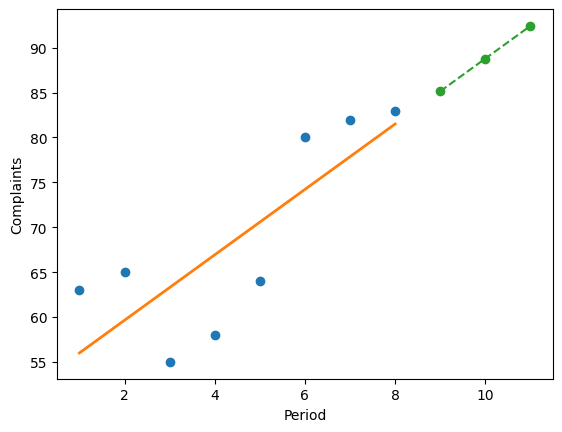

In [177]:
plt.plot(x, y, linestyle="none", marker='o')
plt.plot(x, y_p, linewidth=2)
plt.plot(x2, y_p2, marker='o', linestyle='dashed')
plt.xlabel('Period')
plt.ylabel('Complaints')
plt.show()

In [178]:
resid = y - y_p

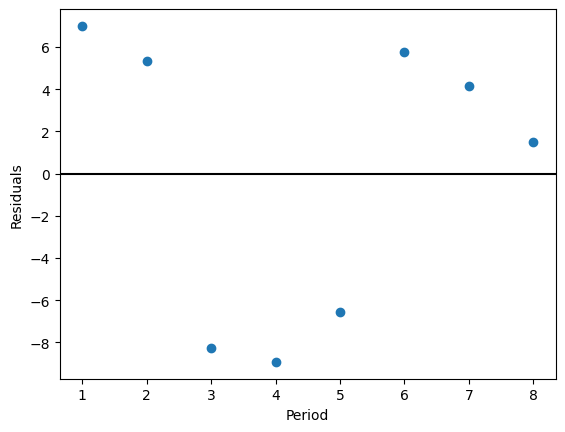

In [179]:
plt.plot(x, resid, linestyle="none", marker='o')
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('Period')
plt.ylabel('Residuals')
plt.show()

## Polynomial

In [180]:
AB = np.polyfit(ct["Period"], ct["Complaints"], 2)

In [181]:
func = np.poly1d(AB)
y_p = func(ct["Period"])

In [182]:
def compute_r2(y_true, y_predict):
    sse = sum((y_true - y_predict)**2)
    tss = (len(y_true) - 1) * np.var(y_true, ddof=1)
    r2_score = 1 - (sse / tss)
    return r2_score

In [183]:
compute_r2(ct["Complaints"], y_p)

0.7942283223693116

In [184]:
x2 = np.array([9, 10, 11])
y_p2 = func(x2)
y_p2

array([ 98.89285714, 111.70238095, 126.3452381 ])

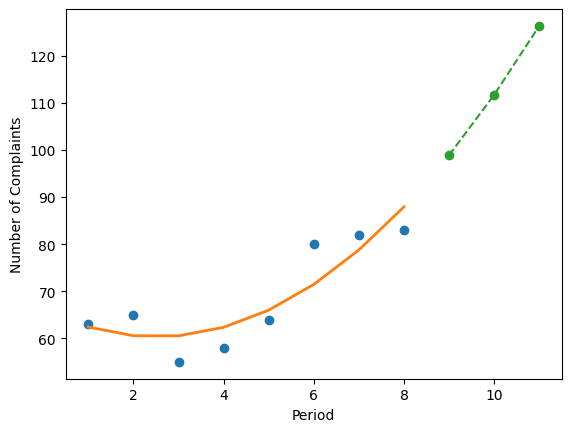

In [185]:
plt.plot(ct["Period"], ct["Complaints"], linestyle="none", marker='o')
plt.plot(ct["Period"], y_p, linewidth=2)
plt.plot(x2, y_p2, marker='o', linestyle='dashed')
plt.xlabel('Period')
plt.ylabel('Number of Complaints')
plt.show()

In [186]:
AB = np.polyfit(ct["Period"], ct["Complaints"], 3)

In [187]:
func = np.poly1d(AB)
y_p = func(ct["Period"])

In [188]:
compute_r2(ct["Complaints"], y_p)

0.8762480649916693

In [189]:
x2 = np.array([9, 10, 11])
y_p2 = func(x2)
y_p2

array([81.64285714, 71.45238095, 51.5952381 ])

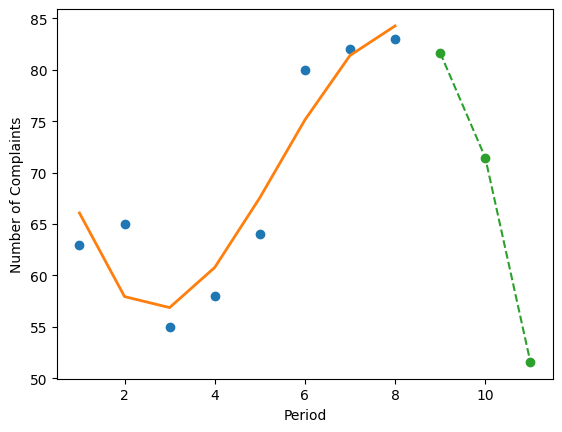

In [190]:
plt.plot(ct["Period"], ct["Complaints"], linestyle="none", marker='o')
plt.plot(ct["Period"], y_p, linewidth=2)
plt.plot(x2, y_p2, marker='o', linestyle='dashed')
plt.xlabel('Period')
plt.ylabel('Number of Complaints')
plt.show()

In [191]:
AB = np.polyfit(ct["Period"], ct["Complaints"], 4)

In [192]:
func = np.poly1d(AB)
y_p = func(ct["Period"])

In [193]:
compute_r2(ct["Complaints"], y_p)

0.9471561222556104

In [194]:
x2 = np.array([9, 10, 11])
y_p2 = func(x2)
y_p2

array([  50.14285714,  -30.04761905, -182.9047619 ])

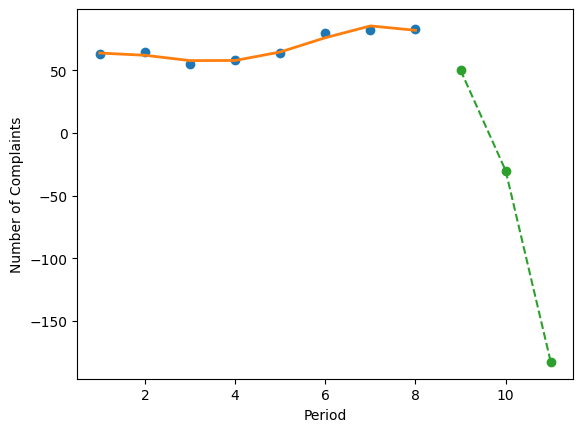

In [195]:
plt.plot(ct["Period"], ct["Complaints"], linestyle="none", marker='o')
plt.plot(ct["Period"], y_p, linewidth=2)
plt.plot(x2, y_p2, marker='o', linestyle='dashed')
plt.xlabel('Period')
plt.ylabel('Number of Complaints')
plt.show()

## Logarithmic

In [196]:
AB = np.polyfit(np.log(ct["Period"]), ct["Complaints"],1)
AB

array([10.19819974, 55.23151768])

In [197]:
y_p = (AB[0]*np.log(ct["Period"]))+AB[1]

In [198]:
compute_r2(ct["Complaints"], y_p)

0.40955054254012213

In [199]:
x2 = np.array([9, 10, 11])
y_p2 = (AB[0]*np.log(x2))+AB[1]
y_p2

array([77.63925279, 78.71374038, 79.68573263])

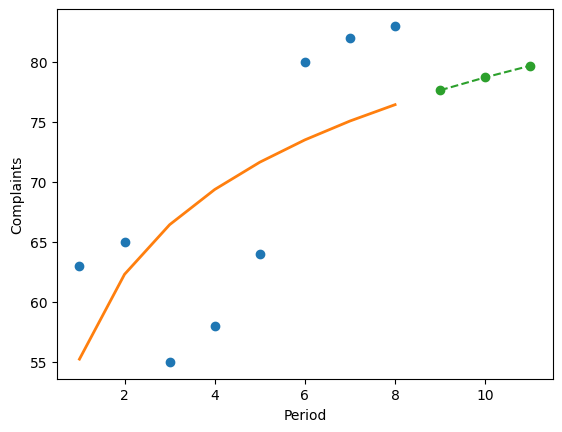

In [200]:
plt.plot(ct["Period"], ct["Complaints"], linestyle="none", marker='o')
plt.plot(ct["Period"], y_p, linewidth=2)
plt.plot(x2, y_p2, marker='o', linestyle='dashed')
plt.xlabel('Period')
plt.ylabel("Complaints")
plt.show()

## Exponential

In [201]:
AB = np.polyfit(ct["Period"], np.log(ct["Complaints"]),1)
AB

array([0.05135859, 3.98785732])

In [202]:
y_p = np.exp(np.polyval(AB, ct["Period"]))

In [203]:
compute_r2(ct["Complaints"], y_p)

0.6611013182837079

In [204]:
x2 = np.array([9, 10, 11])
y_p2 = np.exp(np.polyval(AB, x2))
y_p2

array([85.63419017, 90.14713874, 94.89792111])

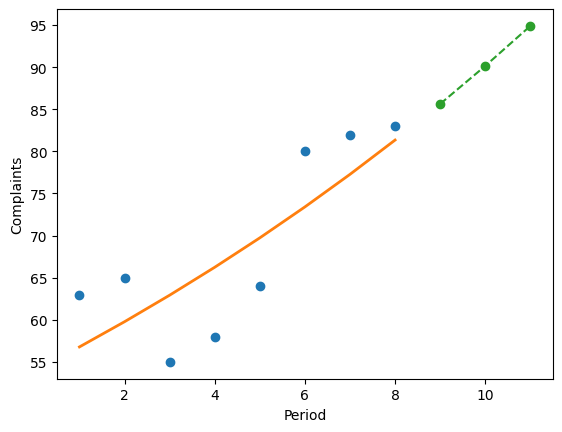

In [205]:
plt.plot(ct["Period"], ct["Complaints"], linestyle="none", marker='o')
plt.plot(ct["Period"], y_p, linewidth=2)
plt.plot(x2, y_p2, marker='o', linestyle='dashed')
plt.xlabel('Period')
plt.ylabel('Complaints')
plt.show()

# Measurement Error

In [262]:
predic_exp = (85.63419017, 90.14713874, 94.89792111)

In [263]:
predic_log = (77.63925279, 78.71374038, 79.68573263)

In [264]:
predic_poly3 = (81.64285714, 71.45238095, 51.5952381)

In [265]:
predic_poly2 = (98.89285714, 111.70238095, 126.3452381)

In [266]:
predic_lin = (85.14285714, 88.78571429, 92.42857143)

In [267]:
actual = (75, 70, 73)

In [268]:
me = pd.DataFrame(list(zip(actual, predic_lin, predic_poly2, predic_poly3, predic_log, predic_exp)), columns=["Actual", "Linear", "Poly2", "Poly3", "Log", "Exponential"])

In [269]:
me

,Actual,Linear,Poly2,Poly3,Log,Exponential
0,75,85.142857,98.892857,81.642857,77.639253,85.634190
1,70,88.785714,111.702381,71.452381,78.713740,90.147139
2,73,92.428571,126.345238,51.595238,79.685733,94.897921


## MAD

In [270]:
def MAD(y_true, y_predict):
    return np.mean(np.absolute(y_true - y_predict))

In [271]:
MAD(me["Actual"], me["Linear"])

16.119047620000003

In [272]:
MAD(me["Actual"], me["Poly2"])

39.64682539666667

In [273]:
MAD(me["Actual"], me["Poly3"])

9.833333330000002

In [274]:
MAD(me["Actual"], me["Log"])

6.012908600000003

In [275]:
MAD(me["Actual"], me["Exponential"])

17.559750006666665

## MSE

In [276]:
from sklearn.metrics import mean_squared_error

In [277]:
mean_squared_error(me["Actual"], me["Linear"])

277.7500000528573

In [278]:
mean_squared_error(me["Actual"], me["Poly2"])

1718.5572090523547

In [279]:
mean_squared_error(me["Actual"], me["Poly3"])

168.1335978006878

In [280]:
mean_squared_error(me["Actual"], me["Log"])

42.53131583313739

In [281]:
mean_squared_error(me["Actual"], me["Exponential"])

332.837382973439

## MAPE

In [282]:
def MAPE(y_true, y_predict):
    return np.mean((np.absolute(y_true - y_predict))/y_true *100)

In [283]:
MAPE(me["Actual"], me["Linear"])

22.325008543652974

In [284]:
MAPE(me["Actual"], me["Poly2"])

54.83588047068059

In [285]:
MAPE(me["Actual"], me["Poly3"])

13.41785480858013

In [286]:
MAPE(me["Actual"], me["Log"])

8.375247370724075

In [287]:
MAPE(me["Actual"], me["Exponential"])

24.31923306785823

# Associative Models

In [219]:
Sales = (46, 18, 20, 22, 27, 34, 14, 37, 30)

In [220]:
BreakIn = (9, 3, 3, 5, 4, 7, 2, 6, 4)

In [221]:
lk = pd.DataFrame(list(zip(Sales, BreakIn)), columns=["Sales", "BreakIn"])

In [222]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [224]:
x = np.array(lk["BreakIn"]).reshape((-1, 1))
y = np.array(lk["Sales"])

In [225]:
model = LinearRegression().fit(x, y)

In [226]:
b = model.coef_
b

array([4.2752809])

In [227]:
a = model.intercept_
a

7.129213483146071

In [228]:
model.score(x,y)

0.8604836720563194

In [229]:
y_p = model.predict(x)

In [230]:
x2 = np.array([6, 8, 10, 12]).reshape((-1, 1))

In [231]:
y_p2 = model.predict(x2)
y_p2

array([32.78089888, 41.33146067, 49.88202247, 58.43258427])

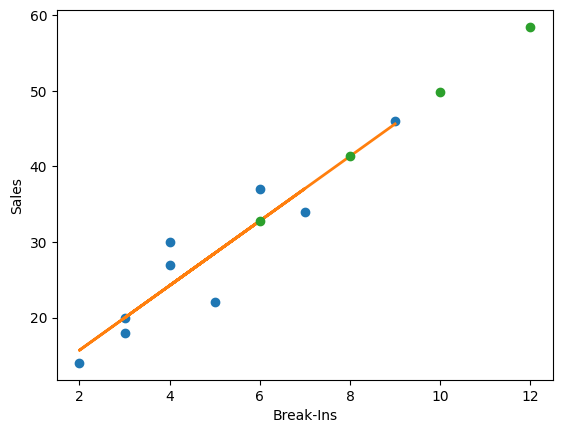

In [233]:
plt.plot(lk["BreakIn"], lk["Sales"], linestyle="none", marker='o')
plt.plot(lk["BreakIn"], y_p, linewidth=2)
plt.plot(x2, y_p2, marker='o', linestyle="none")
plt.xlabel('Break-Ins')
plt.ylabel('Sales')
plt.show()